Question 1

In [1]:
import numpy as np
from scipy.io.matlab import loadmat
from scipy.optimize import linear_sum_assignment

In [9]:
salinas = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
salinas.shape

(512, 217, 204)

In [10]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas_gt.shape

(512, 217)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = salinas.reshape((512*217,204))
y = salinas_gt.reshape(512*217)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80)

In [13]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import chisquare

In [15]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
cm = confusion_matrix(y_test,predicted)

In [16]:
model.score(X_test,y_test)

0.9060348319157554

In [17]:
chisquare(cm,axis=None)

Power_divergenceResult(statistic=1572434.2704648757, pvalue=0.0)

In [18]:
k = len(np.unique(y))
model = KMeans(n_clusters=k)
predicted = model.fit_predict(X)
cm = confusion_matrix(y,predicted)
chisquare(cm,axis=None)

Power_divergenceResult(statistic=1608200.0493051556, pvalue=0.0)

In [19]:
model = DBSCAN()
model.fit(X)
predicted = model.fit_predict(X)
chisquare(confusion_matrix(y,predicted),axis=None)

Power_divergenceResult(statistic=10222045.201756908, pvalue=0.0)

Question 2

In [22]:
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [23]:
model1 = SVC(C=1.1,
             degree=2,
             kernel='poly',
             max_iter=12500,
             tol=1e-4)
model1.fit(X_train,y_train)

predicted = model1.predict(X_test)

print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)

c:\users\eysan.sans\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.7591017505962828


array([[10768,     2,     2,   364,   272,   520,    17,     3,    30,
         1242,   173,   221,   367,   180,    30,    15,    35],
       [   88,   379,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  110,     5,   720,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [  108,     0,     0,     0,     0,     0,   773,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   91,     0,     0,     0,     0,     0

In [25]:
rows, cols = linear_sum_assignment(cm,maximize=True)
cm = cm[rows,:]
cm = cm[:,cols]
cm

array([[12180,   697,  2792,   902,  4109,  9540,   604,   652,   789,
        13109,  2732,  5366,    66,  1588,   884,   666,   299],
       [    0,  2004,     5,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,  2136,  1475,     0,     0,     0,     0,    96,     2,
            0,     0,     0,     0,     0,    12,     0,     5],
       [ 1420,     0,     0,     0,     2,   316,     0,     0,     0,
          238,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,  1384,    10,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   98,     0,     0,     1,    31,  2543,     0,     0,     0,
            0,     0,     5,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,     0,  3747,     0,     0,
            3,    91,    95,     0,     2,    20,     0,     0],
       [    1,     0,     6,     0,     0,     1

Question 3

In [26]:
import numpy as np
import pandas as pd
import math

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.svm import SVC

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,9)

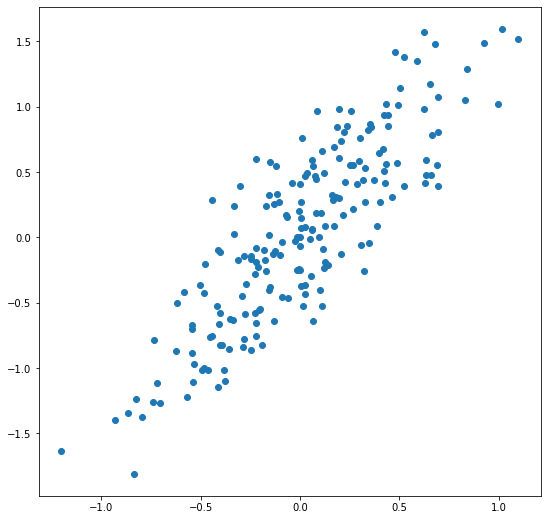

In [27]:
def randEllipse(ps,theta0,center,N):
    a,b = ps
    x0,y0 = center
    rot = np.array([[math.cos(theta0),math.sin(theta0)],[-math.sin(theta0),math.cos(theta0)]])
    result = []
    for i in range(N):
        r0 = np.random.normal(loc=1.0,scale=0.5)
        theta = np.random.uniform(0, 2*math.pi)
        point = np.matmul(np.array([x0+a*r0*math.cos(theta),y0+b*r0*math.sin(theta)]),rot)
        result.append(point)
    return result

cloud = np.array(randEllipse((0.25,1),-math.pi/6,(0,0),200))
data = pd.DataFrame({"x": cloud[:,0], "y": cloud[:,1]})

plt.scatter(data["x"],data["y"])

[1.85260366 0.14739634]


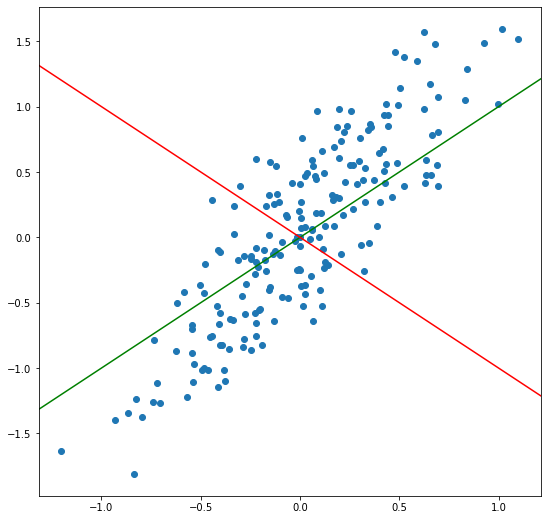

In [28]:
eigvals, eigvectors = np.linalg.eig(data.corr())
print(eigvals)

def perp(xs):
    return [xs[1],-xs[0]]

plt.scatter(data["x"],data["y"])
plt.axline([0,0],perp(eigvectors[0]),c='green')
plt.axline([0,0],eigvectors[0],c='red')

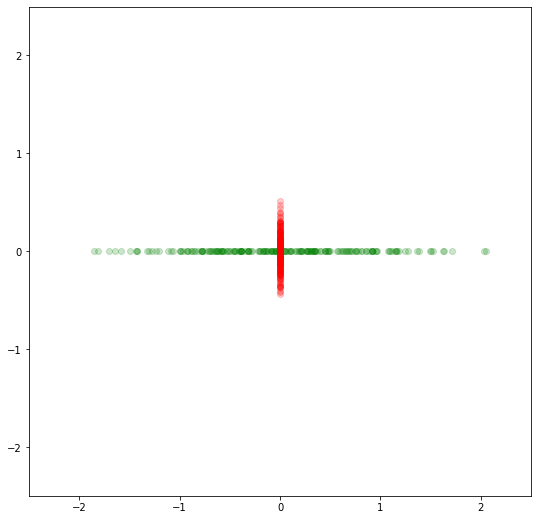

In [29]:
model = PCA()

projected = model.fit_transform(data)

plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))
plt.scatter(projected[:,0],np.zeros(len(projected)),c='green',alpha=0.2)
plt.scatter(np.zeros(len(projected)),projected[:,1],c='red',alpha=0.2)